# Multi-Armed Bandit

Reinforcement Learning comes with its own classic example - the Multi-Armed Bandit problem. Never heard? 

* Assume you're at a casino and in a section with some slot machines. 
* Let's say you're at a section with 10 slot machines in a row and it says "Play for free! 
* Max payout is 10 dollars" 
* Each slot machine is guaranteed to give you a reward between 0 and 10 dollars. 
* Each slot machine has a different average payout, 
* You don't have previous information about the machines,
* GOAL: You have to figure out which one gives the most average reward so that you can maximize your reward in the shortest time possible. Formerly you need to decide which machines to play and the order. 

### Strategy

One very obvious approach would be to pull the same lever every time. The probability of hitting the jackpot being very low, you'd mostly be losing money by doing this. **Formally, this can be defined as a pure exploitation approach.**

Alternatively, you could pull the lever of each slot machine in hopes that at least one of them would hit the jackpot. This is another naive approach which would give you sub-optimal returns. **Formally this approach is a pure exploration approach.**

### $ϵ $(epsilon)-greedy algorithm

One very famous approach to solving reinforcement learning problems is the ϵ (epsilon)-greedy algorithm, such that, with a probability $ϵ$: 

> you will choose an action a at random (exploration), and the rest of the time (probability 1−ϵ) you will select the best lever based on what you currently know from past plays (exploitation). So most of the time you play greedy, but sometimes you take some risks and choose a random lever and see what happens.

### # STRATEGY 1:  

for each arm, you run a loop of 10 iterations, and generate a random float every time.  If this random number is less than the probability of that arm, you'll add a 1 to the reward

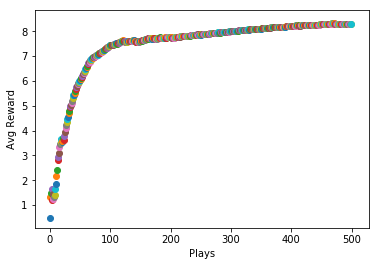

In [14]:
%matplotlib inline
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt
np.random.seed(5)


# You'll be solving the 10-armed bandit problem, hence n = 10
# SETTINGS
n = 10
arms = np.random.rand(n) # returns a number from 1 to 10
eps = 0.1 # epsilon (probability of random choice of a lever, so it unleash the exploration)


# REWARD: USE THE MEAN
def reward(prob):

    reward = 0
    for i in range(10):
        if random.random() < prob:
            reward += 1
    return reward

# Keep a history of all actions and their rewards  
# Initialize memory array; has 1 row defaulted to random action index
# It is a 2 x k matrix where each row is an index reference to your arms array (1st element), and the reward received (2nd element). 
# For example, if a row in your memory array is [2, 8], 
# it means that action 2 was taken (the 3rd element in our arms array) and you received a reward of 8 for taking that action.

av = np.array([np.random.randint(0,(n+1)), 0]).reshape(1,2) #av = action-value


# Greedy method to select best arm based on memory array
def bestArm(a):
    bestArm = 0
    bestMean = 0
    for u in a:
        avg = np.mean(a[np.where(a[:,0] == u[0])][:,1])
        if bestMean < avg:
            bestMean = avg
            bestArm = u[0]
    return bestArm

  
## PLOT of the rewards overtime
plt.xlabel("Plays")
plt.ylabel("Avg Reward")

# Let's say we play 500 times
for i in range(500):
    if random.random() > eps: #greedy arm selection (Exploitation)
        choice = bestArm(av)
        thisAV = np.array([[choice, reward(arms[choice])]])
        av = np.concatenate((av, thisAV), axis=0) 
        
    else: #random arm selection (Exploration)
        choice = np.where(arms == np.random.choice(arms))[0][0]
        thisAV = np.array([[choice, reward(arms[choice])]]) #choice, reward 
        av = np.concatenate((av, thisAV), axis=0) #add to our action-value memory array
        
    #calculate the percentage the correct arm is chosen (you can plot this instead of reward)
    percCorrect = 100*(len(av[np.where(av[:,0] == np.argmax(arms))])/len(av)*1.0)
    
    #calculate the mean reward
    runningMean = np.mean(av[:,1])
    
    
    plt.scatter(i, runningMean)


As expected, your agent learns to choose the arm which gives it the maximum average reward after several iterations of gameplay. 

Thus, you've implemented a straightforward reinforcement learning algorithm to solve the Multi-Arm Bandit problem.   

###  STRATEGY 2: 
Simpler version using Welford's method to calculate the average Qt+1 = Qt + (kt - Qt)/n

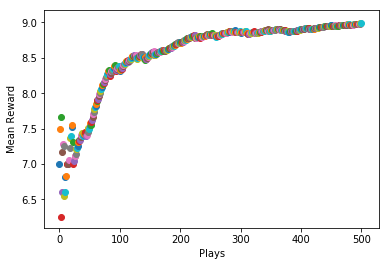

In [2]:

n = 10
arms = np.random.rand(n) # a probability vector of 10 elements
eps = 0.1

av = np.ones(n) #initialize action-value array
counts = np.zeros(n) #stores counts of how many times we've taken a particular action

def reward(prob):
    total = 0;
    for i in range(10):
        if random.random() < prob:
            total += 1
    return total

#our bestArm function is much simpler now
def bestArm(a):
    return np.argmax(a) #returns index of element with greatest value

plt.xlabel("Plays")
plt.ylabel("Mean Reward")

for i in range(500):
    if random.random() > eps:
        choice = bestArm(av)
        counts[choice] += 1
        k = counts[choice]
        rwd =  reward(arms[choice])
        old_avg = av[choice]
        new_avg = old_avg + (1/k)*(rwd - old_avg) #update running avg
        av[choice] = new_avg
        
    else:
        choice = np.where(arms == np.random.choice(arms))[0][0] #randomly choose an arm (returns index)
        counts[choice] += 1
        k = counts[choice]
        rwd =  reward(arms[choice])
        old_avg = av[choice]
        new_avg = old_avg + (1/k)*(rwd - old_avg) #update running avg
        av[choice] = new_avg
        
    #have to use np.average and supply the weights to get a weighted average
    runningMean = np.average(av, weights=np.array([counts[i]/np.sum(counts) for i in range(len(counts))]))
    plt.scatter(i, runningMean)

Source: https://www.datacamp.com/community/tutorials/introduction-reinforcement-learning

In [37]:
# Helps...

a = np.arange(2).reshape(1, 2)
print(a.shape)
b = np.array([[12, 13]])

print(a)
print(b)


print('slicing a: ', a[:,0]) 
print('slicing b: ', b[:,0])

arms =10
print(np.random.choice(arms))


(1, 2)
[[0 1]]
[[12 13]]
slicing a:  [0]
slicing b:  [12]
9
